In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

results_file = './results/jetson/results.csv'
df = pd.read_csv(results_file)

df['throughput'] = df['query_size'] / df['latency_(s)']

df.head()

,cpu_architecture,cpu_core_count,cpu_model_name,total_DRAM_(GB),storage_read_count,storage_write_count,storage_read_bytes,storage_write_bytes,storage_devices,IO Stats,...,query_size,peak_dram_(MB),peak_WSS_(MB),index,index_type,dtype,latency_(s),recall1,recall2,throughput
0,aarch64,4,Cortex-A57,1.925926,514957,34097,4.556062e+10,348311552,"[{'Name': 'mtdblock0', 'Type': 'disk', 'Size':...","[{'Device': 'loop0', 'r/s': '0.00', 'rkB/s': '...",...,10,102.160156,102.160156,gist10K_64D_float32.annoy,annoy,float32,0.162064,1.000,1.0,61.703899
1,aarch64,4,Cortex-A57,1.925926,514957,34097,4.556062e+10,348311552,"[{'Name': 'mtdblock0', 'Type': 'disk', 'Size':...","[{'Device': 'loop0', 'r/s': '0.00', 'rkB/s': '...",...,10,102.433594,102.433594,gist10K_64D_float32.annoy,annoy,float32,0.101937,1.000,1.0,98.099983
2,aarch64,4,Cortex-A57,1.925926,514957,34097,4.556062e+10,348311552,"[{'Name': 'mtdblock0', 'Type': 'disk', 'Size':...","[{'Device': 'loop0', 'r/s': '0.00', 'rkB/s': '...",...,10,102.457031,102.457031,gist10K_64D_float32.annoy,annoy,float32,0.081256,0.990,1.0,123.067606
3,aarch64,4,Cortex-A57,1.925926,514957,34097,4.556062e+10,348311552,"[{'Name': 'mtdblock0', 'Type': 'disk', 'Size':...","[{'Device': 'loop0', 'r/s': '0.00', 'rkB/s': '...",...,10,102.480469,102.480469,gist10K_64D_float32.annoy,annoy,float32,0.110841,0.977,1.0,90.219682
4,aarch64,4,Cortex-A57,1.925926,514957,34107,4.556062e+10,348360704,"[{'Name': 'mtdblock0', 'Type': 'disk', 'Size':...","[{'Device': 'loop0', 'r/s': '0.00', 'rkB/s': '...",...,20,102.539062,102.539062,gist10K_64D_float32.annoy,annoy,float32,0.102870,1.000,1.0,194.420616


In [7]:
Q1 = df['latency_(s)'].quantile(0.25)
Q3 = df['latency_(s)'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['latency_(s)'] >= lower_bound) & (df['latency_(s)'] <= upper_bound)]

In [8]:
df.describe()

,cpu_core_count,total_DRAM_(GB),storage_read_count,storage_write_count,storage_read_bytes,storage_write_bytes,RAM_Used_MB,RAM_Total_MB,SWAP_Used_MB,SWAP_Total_MB,...,dims,index_size,k,query_size,peak_dram_(MB),peak_WSS_(MB),latency_(s),recall1,recall2,throughput
count,738.0,7.380000e+02,7.380000e+02,738.000000,7.380000e+02,7.380000e+02,738.000000,738.0,738.000000,738.0,...,738.000000,738.0,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000
mean,4.0,1.925926e+00,6.826199e+06,42576.289973,1.325164e+11,4.573037e+08,1341.131257,1972.0,81.159394,986.0,...,194.601626,10000.0,40.155827,3065.311653,146.115848,147.770638,9.626954,0.977507,0.992655,914.173050
std,0.0,2.221952e-16,4.113284e+06,5983.330130,7.329196e+10,7.401959e+07,108.367186,0.0,0.779587,0.0,...,118.315431,0.0,39.133544,3475.441652,20.290994,20.862452,12.868864,0.023890,0.011662,1508.211518
min,4.0,1.925926e+00,5.149570e+05,34097.000000,4.556062e+10,3.483116e+08,1195.357143,1972.0,81.000000,986.0,...,64.000000,10000.0,1.000000,10.000000,102.160156,102.160156,0.081256,0.884750,0.925000,21.772950
25%,4.0,1.925926e+00,2.813141e+06,37163.000000,6.573990e+10,3.890012e+08,1235.461883,1972.0,81.000000,986.0,...,96.000000,10000.0,3.250000,80.000000,132.506836,132.544922,0.632304,0.970719,0.991000,47.965220
50%,4.0,1.925926e+00,7.413372e+06,42344.000000,1.242770e+11,4.580475e+08,1340.674242,1972.0,81.000000,986.0,...,192.000000,10000.0,10.000000,1280.000000,145.746094,148.691406,1.980850,0.984000,0.998000,217.018454
75%,4.0,1.925926e+00,9.742196e+06,46494.000000,1.690330e+11,5.079757e+08,1444.372159,1972.0,81.000000,986.0,...,256.000000,10000.0,50.000000,6400.000000,162.933594,162.941406,23.178594,0.994000,1.000000,647.729801
max,4.0,1.925926e+00,1.433139e+07,55517.000000,3.109340e+11,6.071992e+08,1578.223736,1972.0,85.000000,986.0,...,512.000000,10000.0,100.000000,10000.000000,190.792969,190.792969,42.248549,1.000000,1.000000,6444.348160


# Latency

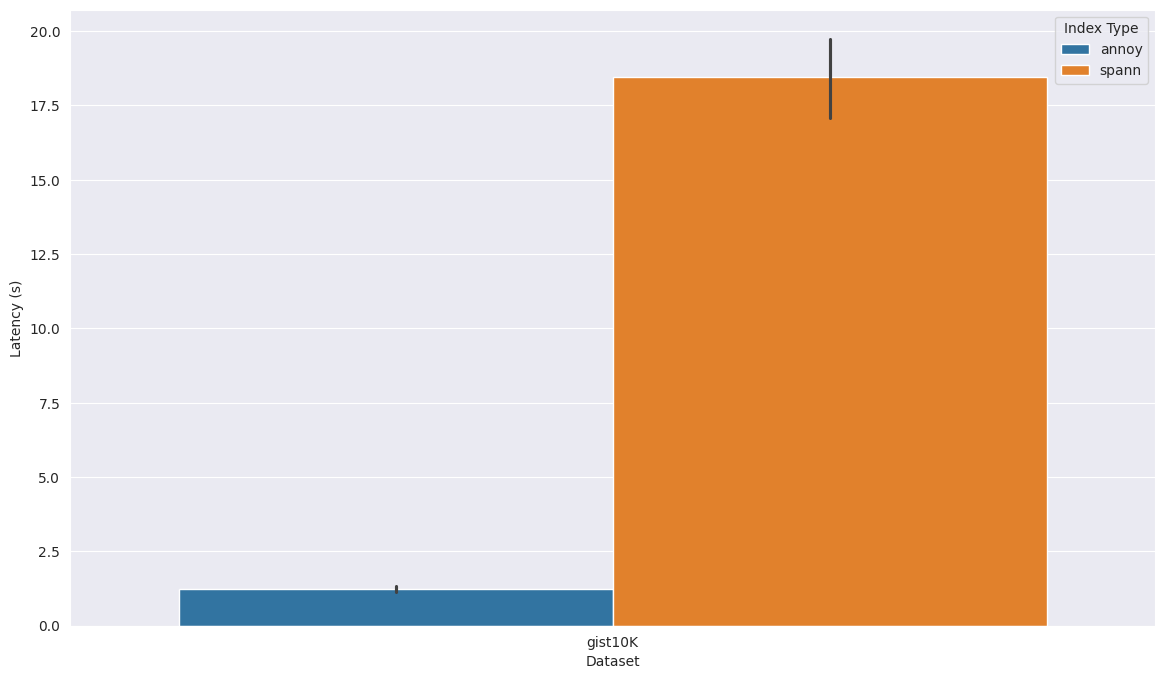

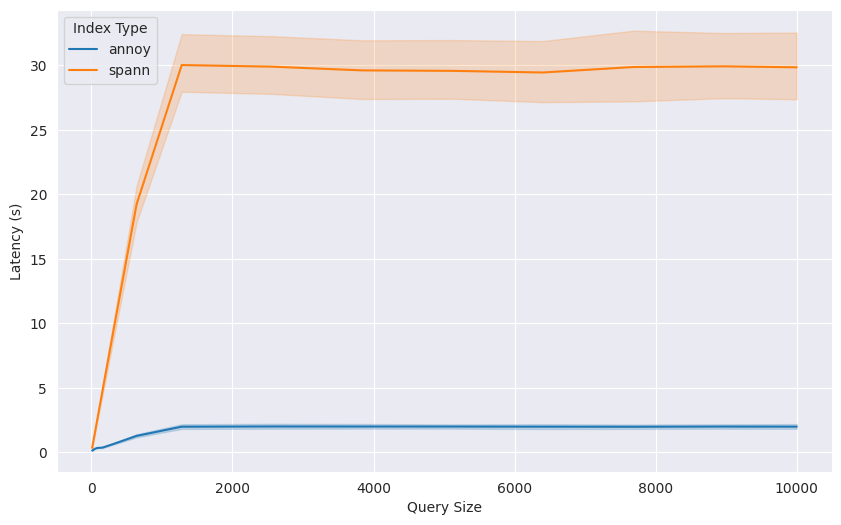

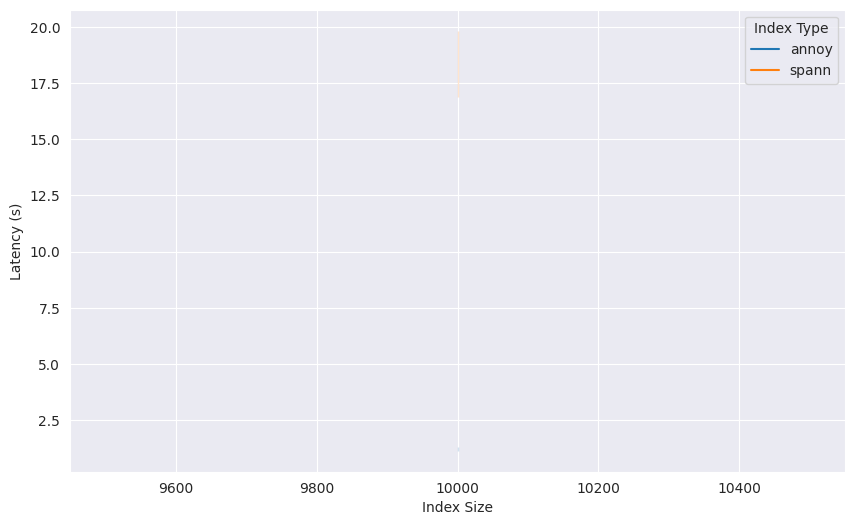

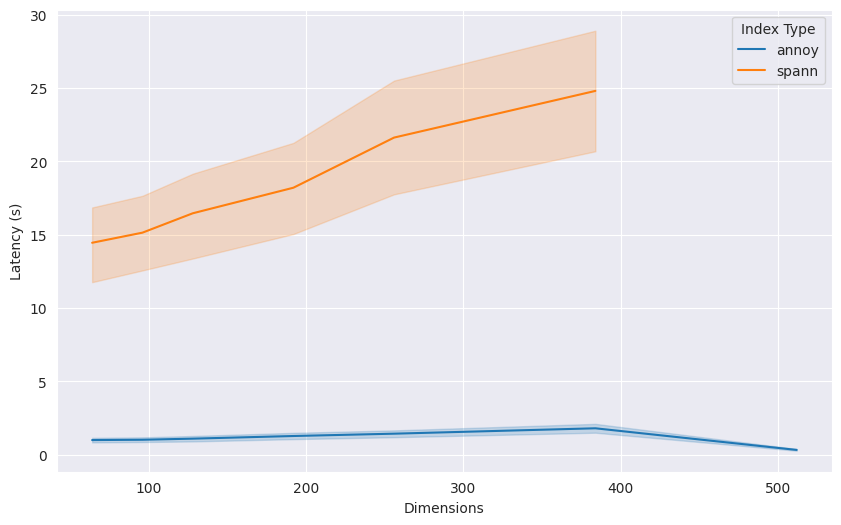

In [9]:
# Latency Distribution
plt.figure(figsize=(14, 8))
sns.barplot(data=df, x='dataset', y='latency_(s)', hue='index_type')
plt.xlabel('Dataset')
plt.ylabel('Latency (s)')
plt.legend(title='Index Type')
plt.savefig('./figures/latency_distribution.png')
plt.show()

# Latency vs Query Size
plt.figure(figsize=(10, 6))
sns.lineplot(x='query_size', y='latency_(s)', hue='index_type', data=df)
plt.xlabel('Query Size')
plt.ylabel('Latency (s)')
plt.legend(title='Index Type')
plt.savefig('./figures/latency_vs_query_size.png')
plt.show()

# Latency vs Index Size
plt.figure(figsize=(10, 6))
sns.lineplot(x='index_size', y='latency_(s)', hue='index_type', data=df)
plt.xlabel('Index Size')
plt.ylabel('Latency (s)')
plt.legend(title='Index Type')
plt.savefig('./figures/latency_vs_index_size.png')
plt.show()

# Latency vs Dimensions
plt.figure(figsize=(10, 6))
sns.lineplot(x='dims', y='latency_(s)', hue='index_type', data=df)
plt.xlabel('Dimensions')
plt.ylabel('Latency (s)')
plt.legend(title='Index Type')
plt.savefig('./figures/latency_vs_dims.png')
plt.show()

# Throughput

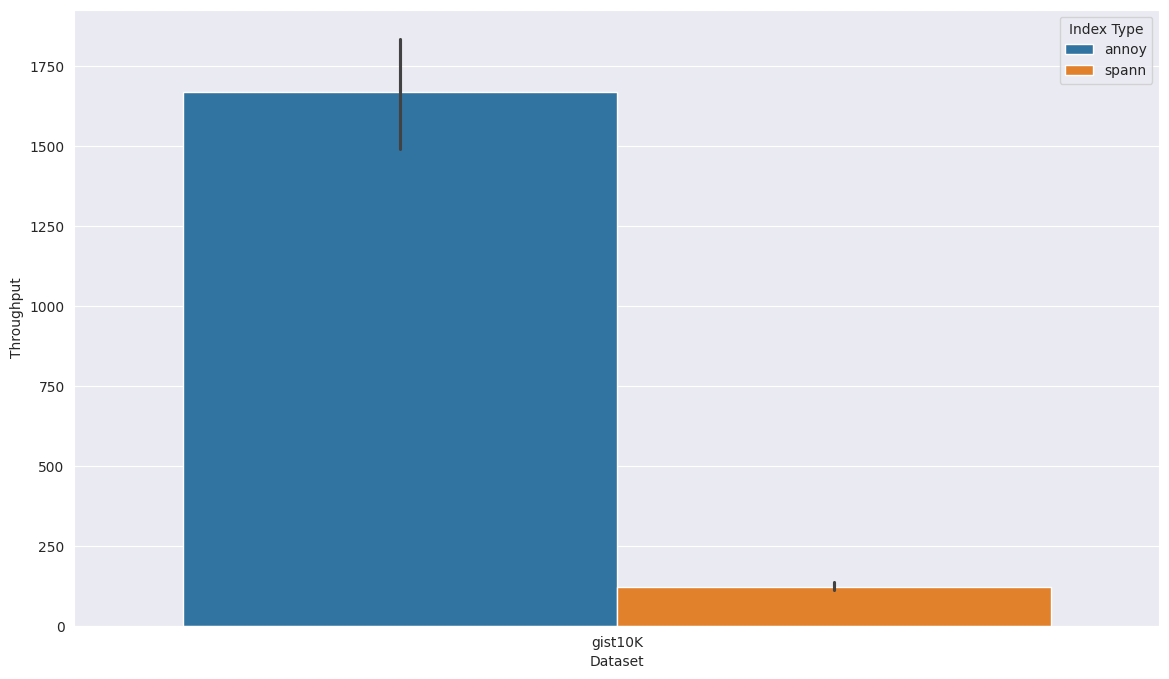

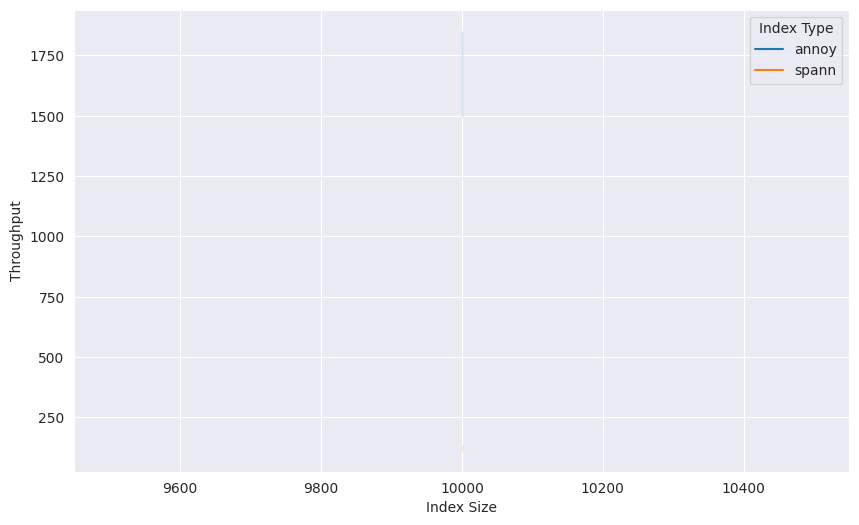

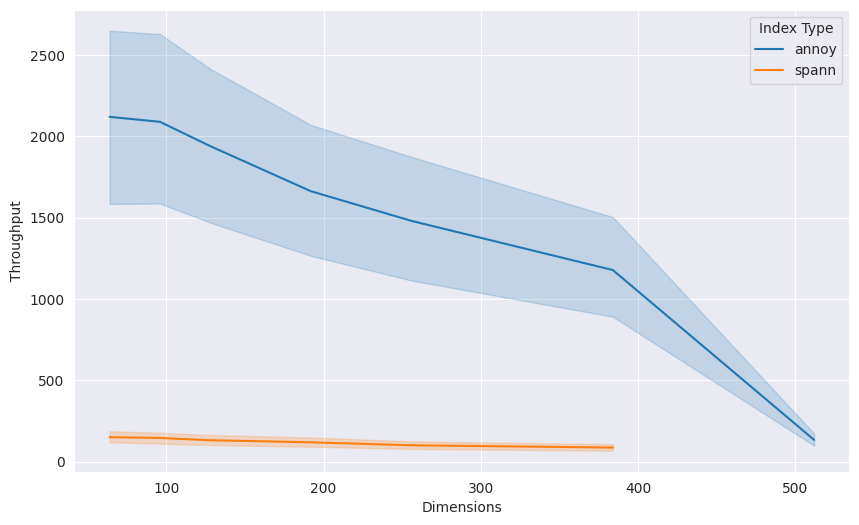

In [10]:
# Latency Distribution
plt.figure(figsize=(14, 8))
sns.barplot(data=df, x='dataset', y='throughput', hue='index_type')
plt.xlabel('Dataset')
plt.ylabel('Throughput')
plt.legend(title='Index Type')
plt.savefig('./figures/throughput_distribution.png')
plt.show()

# # Throughout vs Query Size
# plt.figure(figsize=(10, 6))
# sns.lineplot(x='query_size', y='throughput', hue='index_type', data=df)
# plt.xlabel('Query Size')
# plt.ylabel('Throughput')
# plt.legend(title='Index Type')
# plt.savefig('./figures/throughput_vs_query_size.png')
# plt.show()

# Throughout vs Index Size
plt.figure(figsize=(10, 6))
sns.lineplot(x='index_size', y='throughput', hue='index_type', data=df)
plt.xlabel('Index Size')
plt.ylabel('Throughput')
plt.legend(title='Index Type')
plt.savefig('./figures/throughput_vs_index_size.png')
plt.show()

# Throughout vs Dimensions
plt.figure(figsize=(10, 6))
sns.lineplot(x='dims', y='throughput', hue='index_type', data=df)
plt.xlabel('Dimensions')
plt.ylabel('Throughput')
plt.legend(title='Index Type')
plt.savefig('./figures/throughput_vs_dims.png')
plt.show()

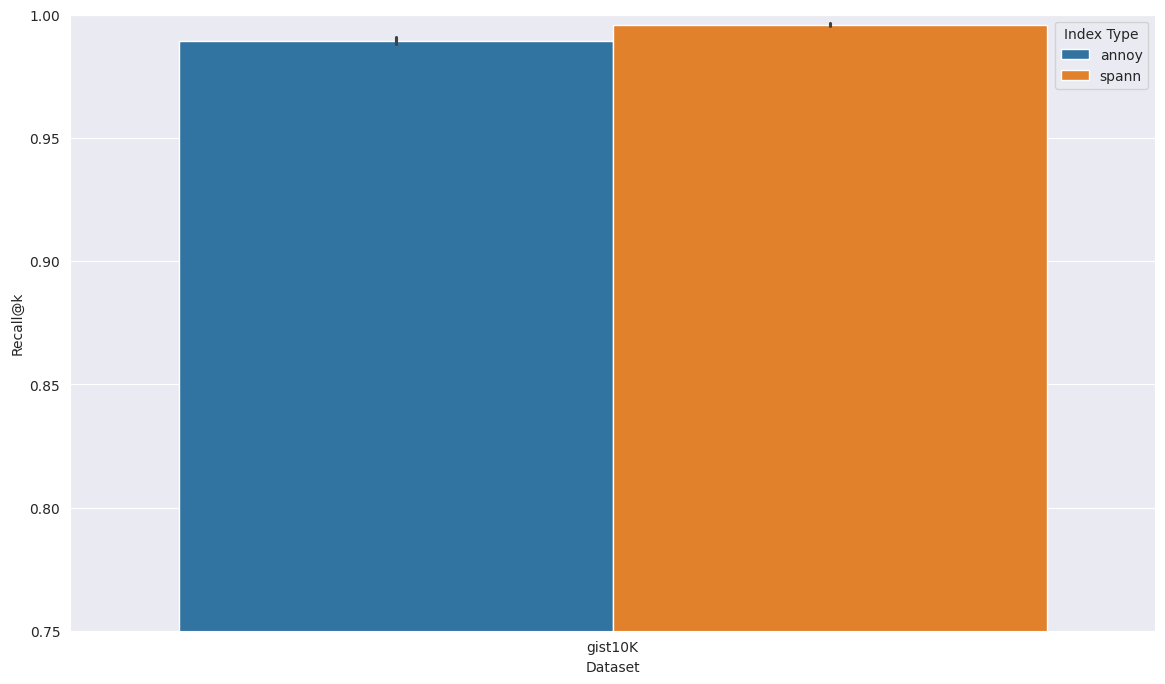

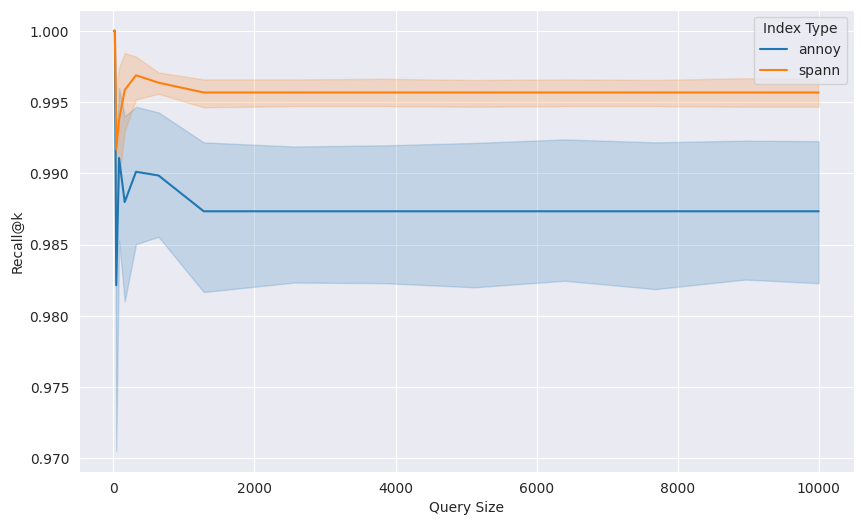

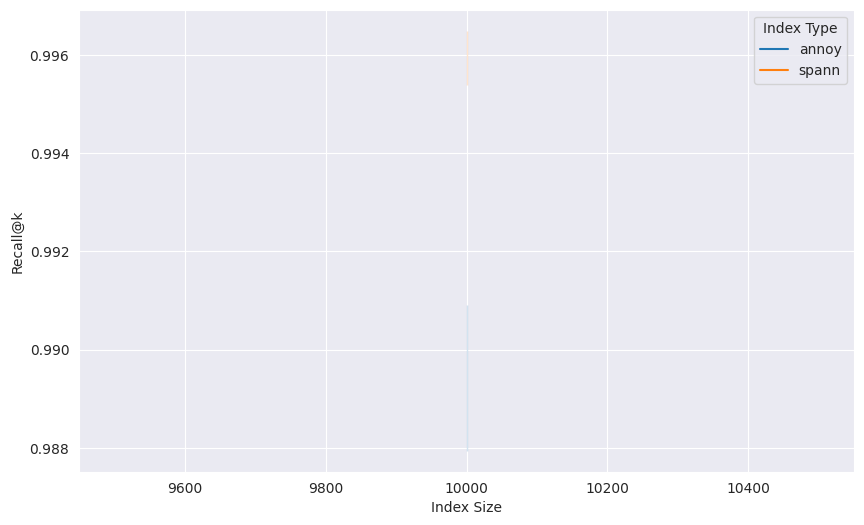

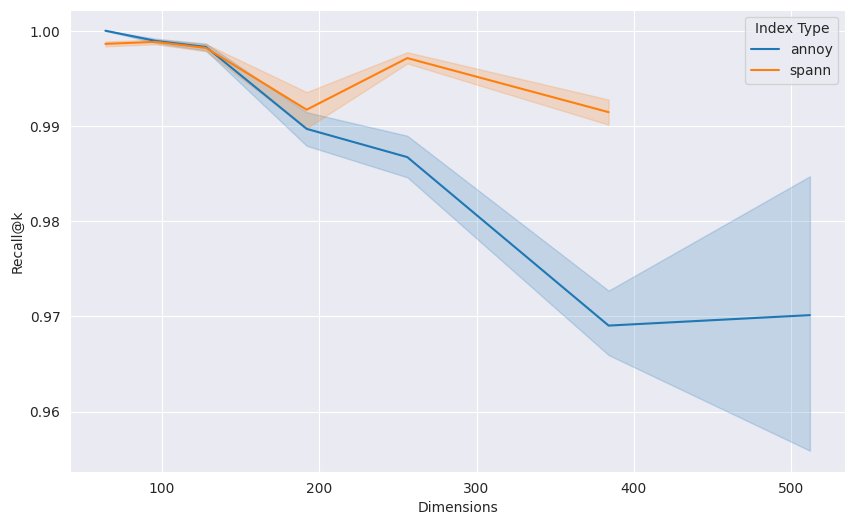

In [11]:
# Recall Distribution
plt.figure(figsize=(14, 8))
sns.barplot(data=df, x='dataset', y='recall2', hue='index_type')
plt.ylim([0.75, 1.0])
plt.xlabel('Dataset')
plt.ylabel('Recall@k')
plt.legend(title='Index Type')
plt.savefig('./figures/recall_distribution.png')
plt.show()

# Recall vs Query Size
plt.figure(figsize=(10, 6))
sns.lineplot(x='query_size', y='recall2', hue='index_type', data=df)
plt.xlabel('Query Size')
plt.ylabel('Recall@k')
plt.legend(title='Index Type')
plt.savefig('./figures/recall_vs_query_size.png')
plt.show()

# Recall vs Index Size
plt.figure(figsize=(10, 6))
sns.lineplot(x='index_size', y='recall2', hue='index_type', data=df)
plt.xlabel('Index Size')
plt.ylabel('Recall@k')
plt.legend(title='Index Type')
plt.savefig('./figures/recall_vs_index_size.png')
plt.show()

# Recall vs Dimensions
plt.figure(figsize=(10, 6))
sns.lineplot(x='dims', y='recall2', hue='index_type', data=df)
plt.xlabel('Dimensions')
plt.ylabel('Recall@k')
plt.legend(title='Index Type')
plt.savefig('./figures/recall_vs_dims.png')
plt.show()

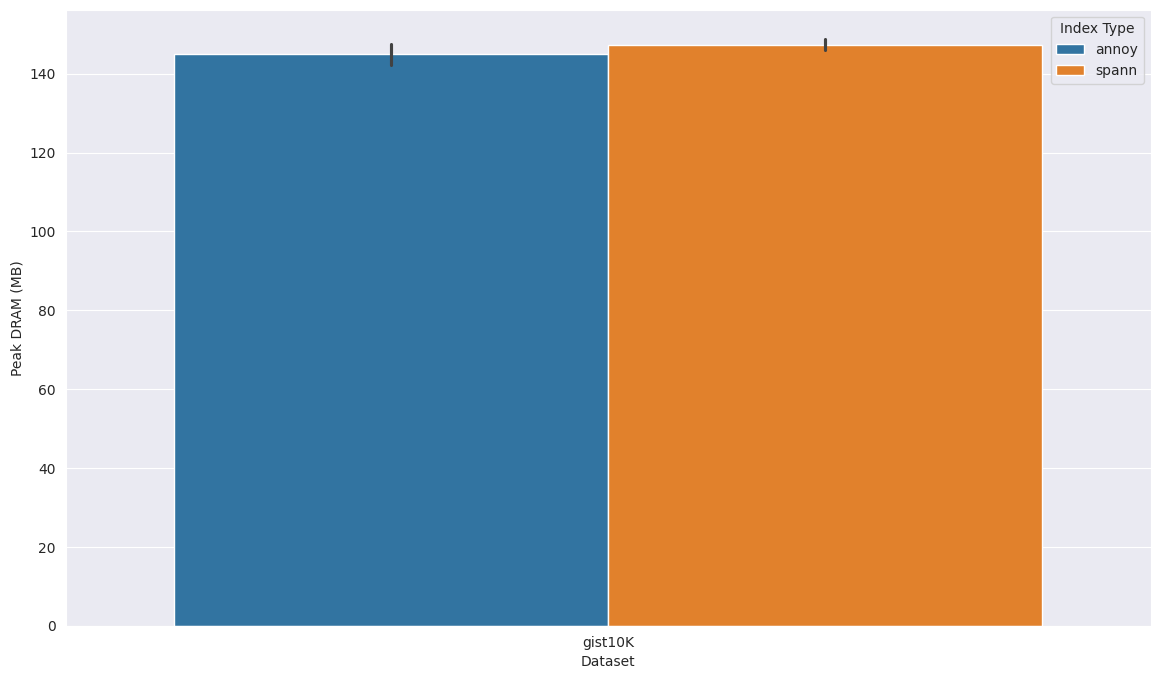

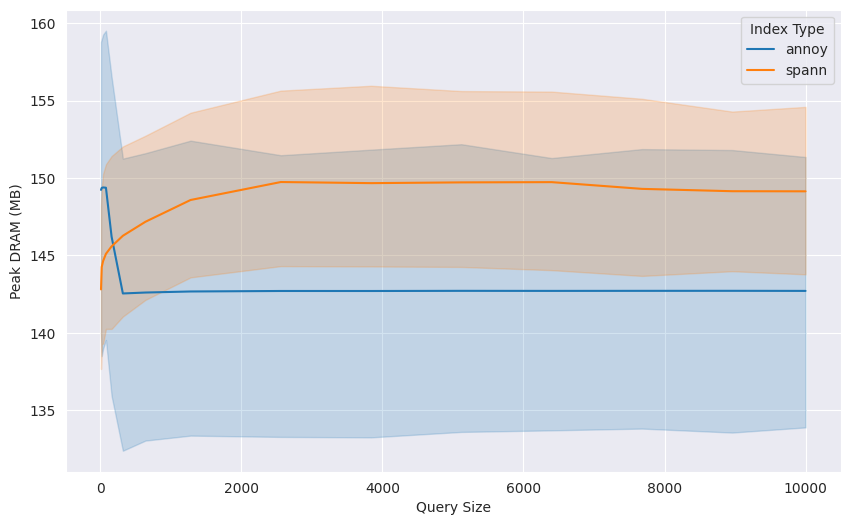

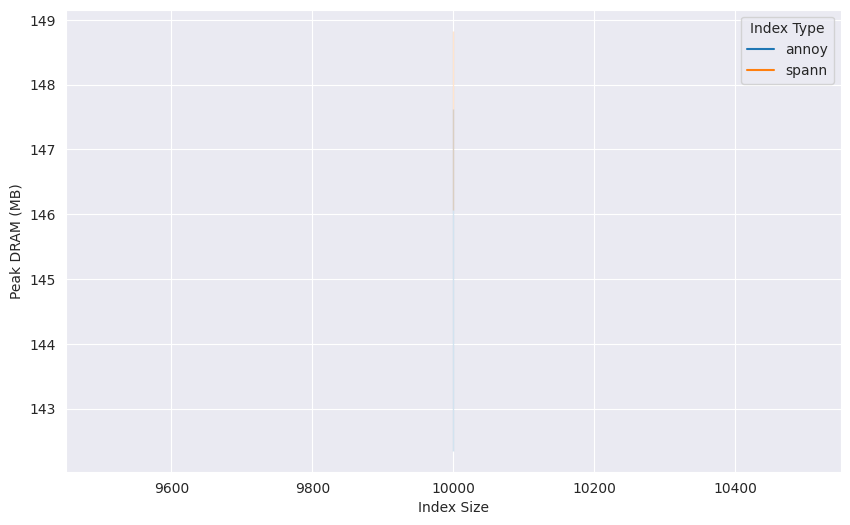

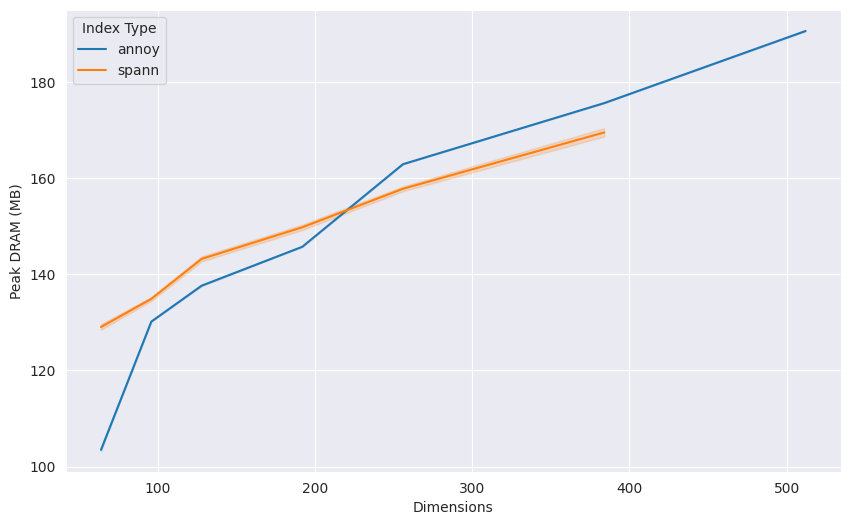

In [12]:
# DRAM Distribution
plt.figure(figsize=(14, 8))
sns.barplot(data=df, x='dataset', y='peak_dram_(MB)', hue='index_type')
plt.xlabel('Dataset')
plt.ylabel('Peak DRAM (MB)')
plt.legend(title='Index Type')
plt.savefig('./figures/dram_distribution.png')
plt.show()

# DRAM vs Query Size
plt.figure(figsize=(10, 6))
sns.lineplot(x='query_size', y='peak_dram_(MB)', hue='index_type', data=df)
plt.xlabel('Query Size')
plt.ylabel('Peak DRAM (MB)')
plt.legend(title='Index Type')
plt.savefig('./figures/dram_vs_query_size.png')
plt.show()

# DRAM vs Index Size
plt.figure(figsize=(10, 6))
sns.lineplot(x='index_size', y='peak_dram_(MB)', hue='index_type', data=df)
plt.xlabel('Index Size')
plt.ylabel('Peak DRAM (MB)')
plt.legend(title='Index Type')
plt.savefig('./figures/dram_vs_index_size.png')
plt.show()

# DRAM vs Dimensions
plt.figure(figsize=(10, 6))
sns.lineplot(x='dims', y='peak_dram_(MB)', hue='index_type', data=df)
plt.xlabel('Dimensions')
plt.ylabel('Peak DRAM (MB)')
plt.legend(title='Index Type')
plt.savefig('./figures/dram_vs_dims.png')
plt.show()

In [ ]:
# Average recall by query size and index type
recall_avg = df.groupby(['query_size', 'index_type'])['recall2'].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.lineplot(data=recall_avg, x='query_size', y='recall2', hue='index_type', marker='o')
plt.title('Average Recall@k (recall2) by Query Size and Index Type')
plt.xlabel('Query Size')
plt.ylabel('Recall@k (recall2)')
plt.legend(title='Index Type')
plt.xscale('log')
plt.show()

plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='query_size', y='recall2', hue='index_type', marker='o')
plt.title('Average Recall@k (recall2) by Query Size and Index Type')
plt.xlabel('Query Size')
plt.ylabel('Recall@k (recall2)')
plt.legend(title='Index Type')
plt.xscale('log')
plt.show()

In [20]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score
# import matplotlib.pyplot as plt
# 
# # Load the data
# csv_file_path = './results/results.csv'  # Adjust this path to where your CSV file is located
# df = pd.read_csv(csv_file_path)
# 
# # Select only the relevant columns
# df = df[['latency_(s)', 'recall2', 'peak_dram_(MB)', 'index_type', 'query_size', 'k', 'dims', 'index_size']]
# 
# # Convert categorical variables to dummy variables
# df = pd.get_dummies(df, columns=['index_type'], drop_first=True)
# 
# # Define the target variable (performance metric to predict, e.g., 'latency_(s)')
# target_variable = 'latency_(s)'
# 
# # Define the features (all other columns except the target)
# features = df.drop(columns=[target_variable])
# 
# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(features, df[target_variable], test_size=0.2, random_state=42)
# 
# # Standardize the features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)
# 
# # Train a regression model
# regressor = LinearRegression()
# regressor.fit(X_train_scaled, y_train)
# 
# # Make predictions
# y_train_pred = regressor.predict(X_train_scaled)
# y_test_pred = regressor.predict(X_test_scaled)
# 
# # Evaluate the model
# train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
# test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
# r2 = r2_score(y_test, y_test_pred)
# 
# print(f'Training RMSE: {train_rmse}')
# print(f'Test RMSE: {test_rmse}')
# print(f'R^2 Score: {r2}')
# 
# # Plot predictions vs actual values
# plt.figure(figsize=(10, 6))
# plt.scatter(y_test, y_test_pred, alpha=0.7)
# plt.xlabel('Actual Latency (s)')
# plt.ylabel('Predicted Latency (s)')
# plt.title('Actual vs Predicted Latency')
# plt.show()